# This is How to Scale Your Data for Deep Learning
-------------------------

Scaling data is amongst the most fundamental steps in preprocessing data before throwing it into a neural network. It allows all the data which is fed into the neural network to be on the same scale. This turns out to be a crucial step, because similar scales in all the features helps the model by easing the training process. It helps greatly with the time it takes to train the model along with improving the actual fit of the model to the training data. If you wish to see an example of how a neural network performs with and without scaled data, you can always refer to the [last chapter of my free book A Coder's Guide to Neural Networks](https://cutt.ly/cg2nn-ch5-medium).

When we talk about scaling data in the world of neural networks, we're, more often than not, referring to 2 different approaches to scaling data. Both are valid but passing your data through only 1 method is sufficient when preprocessing. These 2 different approaches are known as standardization and normalization.

As always, better than just throwing the math at you and explaining with words, let’s step through these 2 methods with code and explain along the way. For our data, we’ll use the Pima Indians Diabetes dataset. Let’s start by importing the dataset along with a few data science libraries which will help us accomplish this task.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv(r'https://raw.githubusercontent.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks/master/data/diabetes.csv')

Now that we got that out of the way, let’s separate out our features from our target and turn them into PyTorch tensors.

In [ ]:
X = df[df.columns[:-1]]
y = df['Outcome']
X = torch.tensor(X.values)
y = torch.tensor(y.values)

Although this is just a demonstration of data scaling, I would like to split our data into a train and test set. It’ll come in handy later on. We’ll use sklearn’s built-in train_test_split method to help us with splitting our data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Before getting into the 2 methods of data scaling, let’s take a look at our data. If you've had the chance to look at the data, you’ll have seen that there’s a feature known as “Insulin”. We’ll take that feature as our example for the purposes of the explanation. 

Let’s take a look at a histogram plot for the Insulin feature using matplotlib. 

(array([263.,  61.,  62.,  49.,  33.,  13.,   8.,   7.,   1.,   4.,   2.,
          5.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([  0. ,  42.3,  84.6, 126.9, 169.2, 211.5, 253.8, 296.1, 338.4,
        380.7, 423. , 465.3, 507.6, 549.9, 592.2, 634.5, 676.8, 719.1,
        761.4, 803.7, 846. ]),
 <a list of 20 Patch objects>)

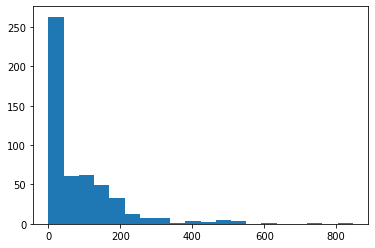

In [ ]:
insulin = list(df.columns).index('Insulin')
plt.hist(X_train.T[insulin], bins=20)

We can see that the distribution of this feature ranges vastly, from 0 past 800. Keep the distribution of our data in mind throughout the rest of this lesson. It's the range of the distribution which gets altered when scaling the data.

Let’s get right into the data scaling method of standardization. 

## Standardization

Standardization is a data scaling method to center the data around 0 (mean of 0) and have the standard deviation to be 1. It forces 95% of the data for the standardized feature to fit between the values -2 and 2, while keeping the mean at 0.

The equation for standardizing our data is very simple. To quickly go over the equation, all we do is find the mean and the standard deviation for each column (we’ll be setting the axis=0 to accomplish this in PyTorch) and then we subtract each column by its respective standard deviation and divide by its respective mean.

If that was a little confusing, looking at it in code should clear it up.

In [ ]:
X_mean = torch.mean(X_train, axis=0)
X_std = torch.std(X_train, axis=0)
X_train_man_stdzd = (X_train-X_mean)/X_std

And we’re finished. We standardized our data.

Let’s take a look at Insulin’s histogram again to see what kind of effect standardization had on our data.

(array([263.,  61.,  62.,  49.,  33.,  13.,   8.,   7.,   1.,   4.,   2.,
          5.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([-0.68519205, -0.31940972,  0.0463726 ,  0.41215493,  0.77793725,
         1.14371958,  1.5095019 ,  1.87528422,  2.24106655,  2.60684887,
         2.9726312 ,  3.33841352,  3.70419585,  4.06997817,  4.43576049,
         4.80154282,  5.16732514,  5.53310747,  5.89888979,  6.26467211,
         6.63045444]),
 <a list of 20 Patch objects>)

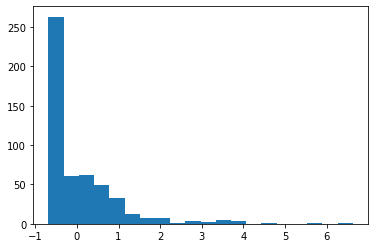

In [ ]:
plt.hist(X_train_man_stdzd.T[insulin], bins=20)

If we refer to the histogram before standardizing our data, we can see that the shape of our data is the same, but it’s been squished into a smaller range. If you remember from above, I stated that standardizing squeezes our data to place 95% of it to be between -2 and 2, while keeping the mean at 0. Looking at the histogram, we can see that that’s exactly what happened.

In practice, instead of manually standardizing our features, it's better to use scitkit-learn's built-in StandardScaler class. It's simple to use and gives us the same result, but that's not entirely the reason as to why it's better to use. If you look at the code cell below, you'll see that I fit the scaler variable to X_train but transformed on both X_train and X_test. The reason for this is, as always, we don't want anything from our test set to leak when training our model, not even the mean or standard deviation. Having said that, it’s crucial that we don’t forget to scale our test data with the findings from our training data, so that our model is able to make predictions. 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sk_stdzd = torch.tensor(scaler.transform(X_train))
X_test_sk_stdzd = torch.tensor(scaler.transform(X_test))

Let’s see how our manual standardizing compares to sklearn’s built-in StandardScaler class. Unfortunately, because math with floating point numbers is an age-old problem for computers, we’re going to rely on PyTorch’s allclose function to see if the numbers match to 2 decimal places. It’s not ideal, but it allows us to see if our numbers are almost equal.

In [ ]:
torch.allclose(X_train_sk_stdzd, X_train_man_stdzd, atol=1e-2)

True

Before we move on, there’s 1 more function of the StandardScaler class I wish to introduce. It’s the inverse_transform function. It allows us to de-standardize our data and bring it back to normal. Again, due to limitations when dealing with floating point numbers, we’re going to use the allclose function to see how de-standardizing our standardized data compares to our original training set.

Note: Not passing a number for atol in the function uses the default, which checks to 8 decimal places.

In [ ]:
torch.allclose(torch.tensor(scaler.inverse_transform(X_train_sk_stdzd)), X_train)

True

## Normalization

Since we already covered standardizing our data, normalizing it is not that much different. This approach of data scaling results in fitting all the data between 0 and 1. The shape remains the same, but the data is all fit in the range of 0 to 1.

The equation is just as simple as standardizing. We subtract the features by their respective minimums, thereafter we divide by the maximum of each feature minus the minimum of each feature.

Let’s look at it in code.

In [ ]:
X_max = torch.max(X_train, axis=0).values
X_min = torch.min(X_train, axis=0).values
X_train_man_norm = (X_train - X_min)/(X_max - X_min)

Now that we normalized our data, let’s look at the histogram of our normalized Insulin feature.

(array([263.,  61.,  62.,  49.,  33.,  13.,   8.,   7.,   1.,   4.,   2.,
          5.,   3.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

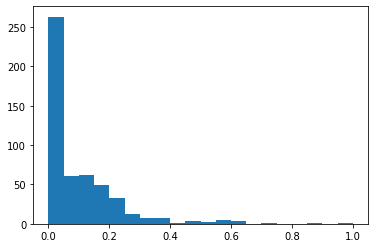

In [ ]:
plt.hist(X_train_man_norm.T[insulin], bins=20)

As expected, the shape of the data is unchanged, but all of it fits in the range from 0 to 1.

Just like standardization, it’s best to use sklearn’s built-in functionality to perform normalization. Sklearn has a MinMaxScaler class which does just that. Let’s see it in action. You’ll see that it’s very similar to the StandardScaler class.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sk_norm = torch.tensor(scaler.transform(X_train))

Let’s quickly take a look at how our manual normalization compares to sklearn’s MinMax class.

In [ ]:
torch.allclose(X_train_sk_norm, X_train_man_norm)

True

And just like the StandardScaler class, we can use MinMax’s inverse_transform function to de-normalize our data.

In [ ]:
torch.allclose(torch.tensor(scaler.inverse_transform(X_train_sk_norm)), X_train)

True

## The Verdict

Now, the question you probably have is, which data scaling approach is better? There’s been a lot of experimentation around the topic of data scaling and different people have different opinions. As for my opinion and my experience, I found that standardizing my data almost always outperforms normalizing it. Best advice I can give is experiment with both and see which works best for your situation.